In [1]:

# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# importing libraries
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.9 MB/s eta 0:00:00


In [2]:
from geopy import distance

## Importing Data

In [3]:
df = pd.read_csv('YourCabs.csv')

In [4]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:

# no of rows and columns i dataset
df.shape

(43431, 19)

In [6]:
# no of columns in the dataset
df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [7]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [8]:

# dividing data into features and label
data = df.drop(['Car_Cancellation'], axis=1)
target = df[['Car_Cancellation']]

In [9]:
# information about the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

## Checking for Missing Values

In [10]:
# checking the missing values
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
dtype: int64

## Data Cleaning

In [11]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)

In [12]:
data.shape

(43431, 11)

In [13]:
data['vehicle_model_id'].value_counts(normalize=True)*100

#so as we can see 12 is covering for 73% of the entire column of vehicle_model_id

12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: vehicle_model_id, dtype: float64

In [14]:
data=data.drop(['vehicle_model_id'],axis=1) #Dropping as single value has more percentage

In [15]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


## Data Transformation

In [16]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [17]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

In [18]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

## Fill missing values

In [19]:

# filling missing values
data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [21]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [22]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
#Fill null with median for Continuous data and mode for Discrete data
#filling na values of to_lat with median of each group where the group is formed based on from_area_id

In [23]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))
#filling na values of to_long with median of each group where the group is formed based on from_area_id

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [25]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [26]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [27]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43431 non-null  float64
 9   to_long              43431 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


## Encoding

In [29]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [30]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [31]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [32]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [33]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [34]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

## Extracting date and time from timestamp

In [35]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [36]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [37]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [38]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [39]:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[m]')

In [40]:
data[data['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,1/20/2013 14:15,0,0,1/20/2013 15:01,0,1,8.482630,01/20/2013,14:15,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,393.0,2/1/2013 9:45,0,0,2/1/2013 13:18,0,1,28.576256,02/01/2013,09:45,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,571.0,2/13/2013 18:00,0,0,2/13/2013 18:29,0,1,5.866543,02/13/2013,18:00,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-29.0
5303,1068.0,2/23/2013 18:00,0,0,2/23/2013 18:03,0,1,3.547502,02/23/2013,18:00,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-3.0
6106,1010.0,3/4/2013 0:30,0,0,3/4/2013 2:00,0,1,10.133543,03/04/2013,00:30,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-90.0


In [41]:
data[data['time_diff'] < 0]['time_diff'].count()

42

In [42]:
data = data.drop(['from_date','booking_created'],axis=1)

In [43]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [44]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [45]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [46]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,1,0,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,21.0
1,Low Cancellation,0,0,1,0,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,395.0
2,Low Cancellation,0,0,1,0,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,22.0
3,Low Cancellation,0,0,1,0,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,66.0
4,Low Cancellation,0,0,1,0,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,67.0


# **Data Visualization -->**

In [47]:
data.columns

Index(['from_area_id', 'online_booking', 'mobile_site_booking',
       'traveltype_pointtopoint', 'traveltype_hourly', 'distance',
       'from_date_day', 'booking_created_day', 'from_date_month',
       'booking_created_month', 'from_date_week', 'booking_created_week',
       'from_date_session', 'booking_created_session', 'time_diff'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  object 
 1   online_booking           43431 non-null  int64  
 2   mobile_site_booking      43431 non-null  int64  
 3   traveltype_pointtopoint  43431 non-null  uint8  
 4   traveltype_hourly        43431 non-null  uint8  
 5   distance                 43431 non-null  float64
 6   from_date_day            43431 non-null  object 
 7   booking_created_day      43431 non-null  object 
 8   from_date_month          43431 non-null  object 
 9   booking_created_month    43431 non-null  object 
 10  from_date_week           43431 non-null  object 
 11  booking_created_week     43431 non-null  object 
 12  from_date_session        43431 non-null  object 
 13  booking_created_session  43431 non-null  object 
 14  time_diff             

In [49]:
data['online_booking'].unique()

array([0, 1])

<Axes: xlabel='online_booking', ylabel='count'>

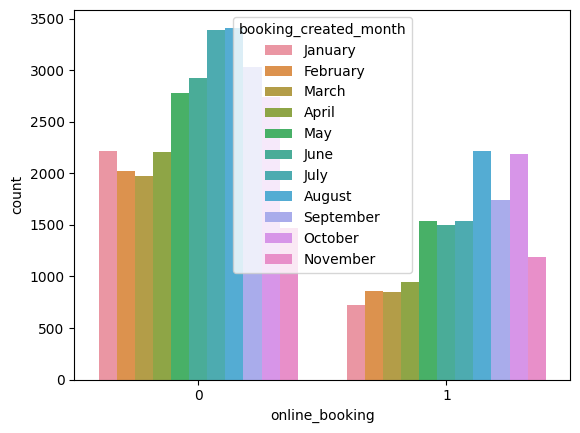

In [50]:
sns.countplot(hue='booking_created_month',x='online_booking',data=data)

<Axes: xlabel='booking_created_week', ylabel='count'>

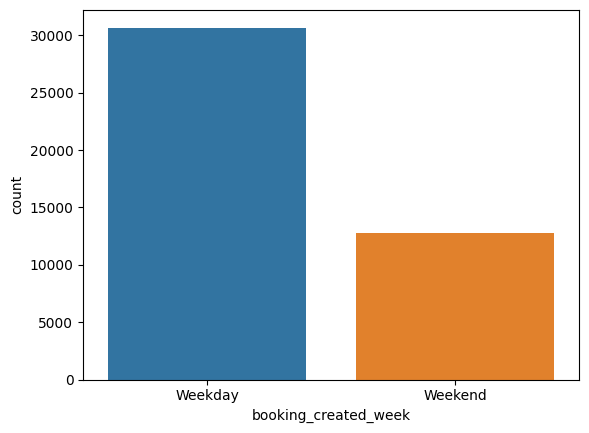

In [51]:
sns.countplot(x='booking_created_week',data=data)

<Axes: xlabel='traveltype_hourly', ylabel='count'>

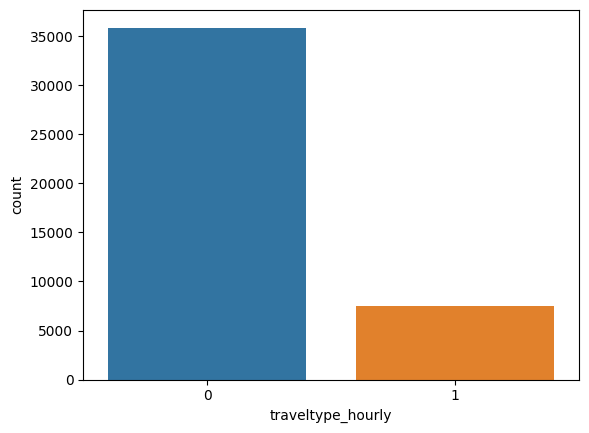

In [52]:
sns.countplot(x='traveltype_hourly',data=data)

<Axes: xlabel='booking_created_session', ylabel='count'>

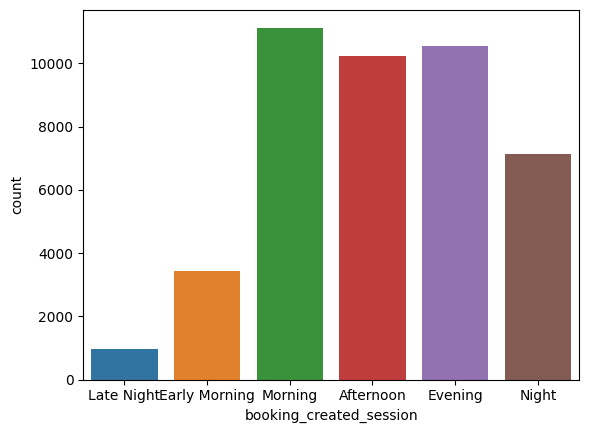

In [53]:
sns.countplot(x='booking_created_session',data=data)

<ipython-input-54-d235e78e97e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['distance'])


<Axes: ylabel='Density'>

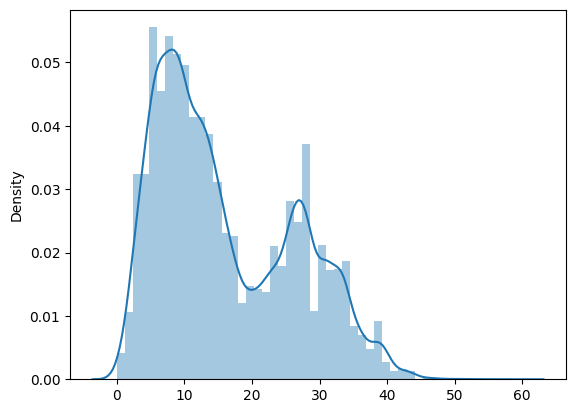

In [54]:
sns.distplot(x=data['distance'])

In [56]:
data['from_area_id'].value_counts()

Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: from_area_id, dtype: int64

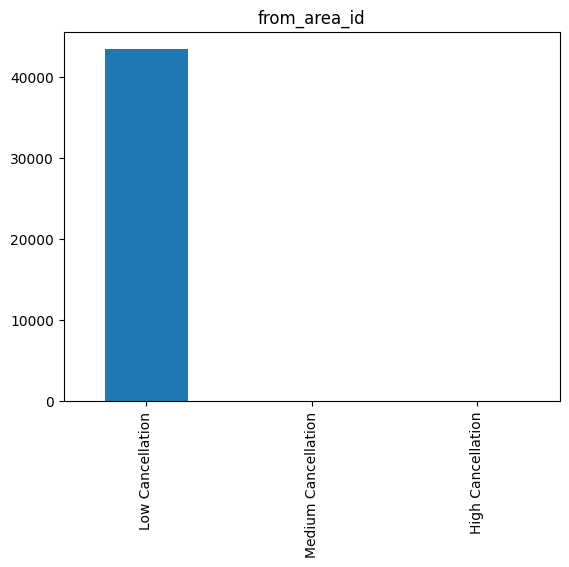

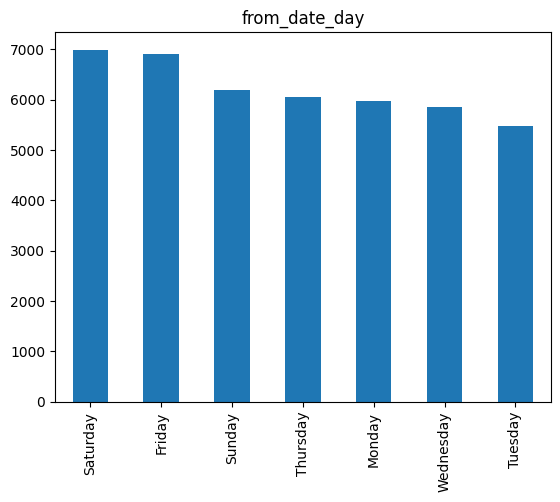

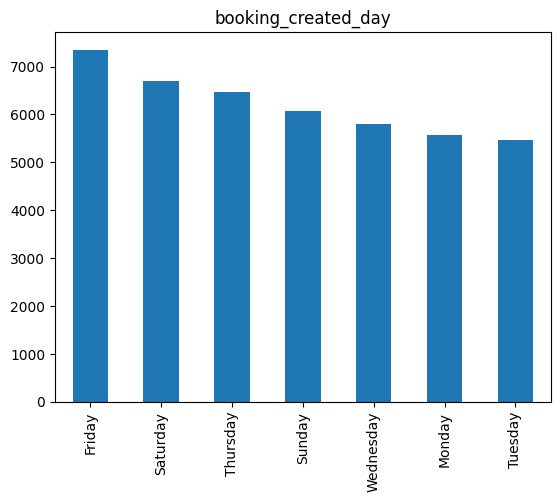

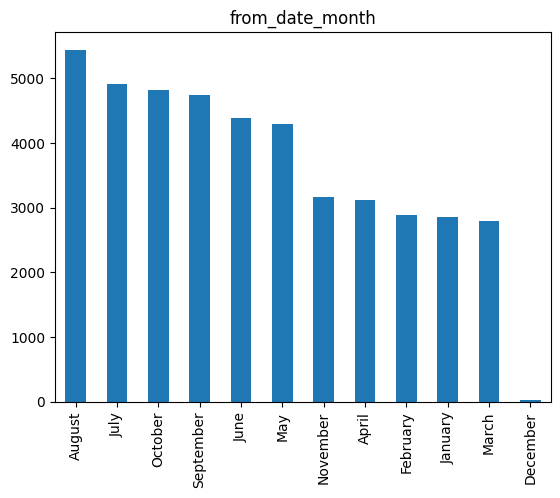

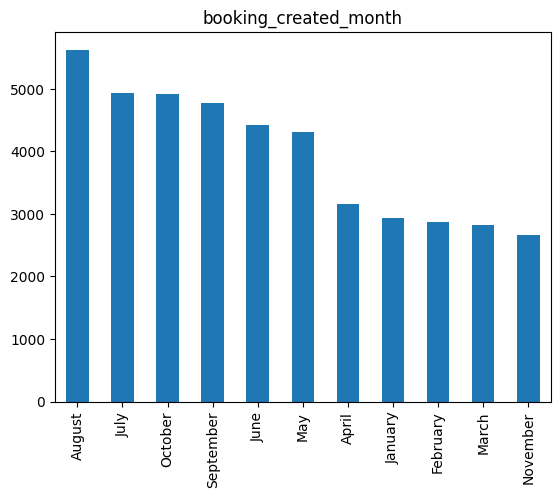

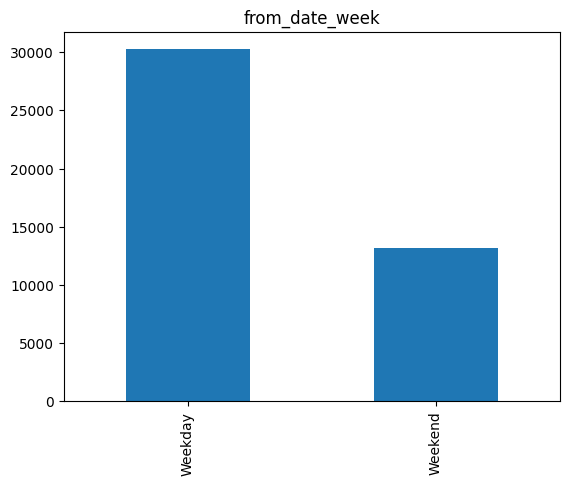

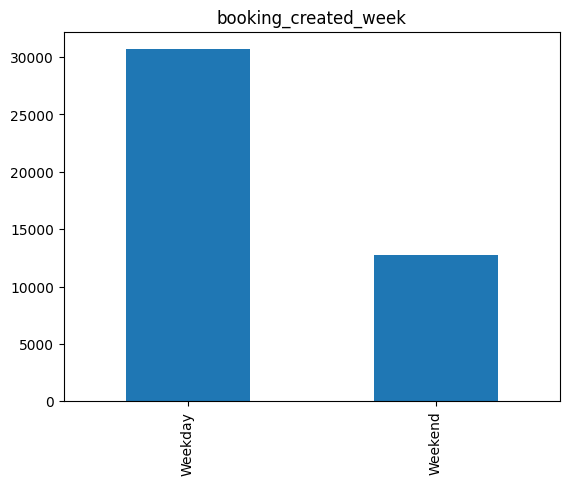

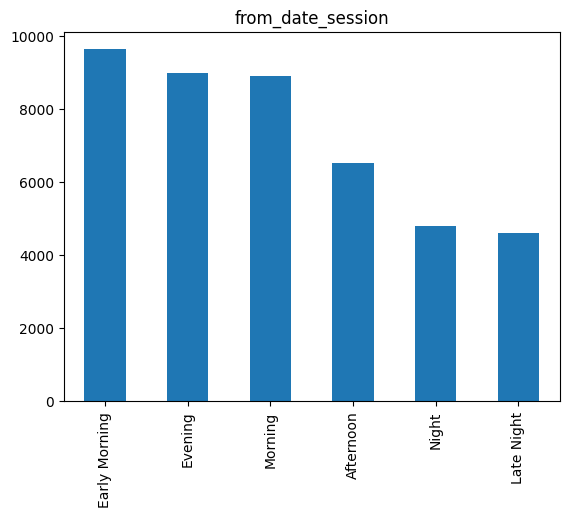

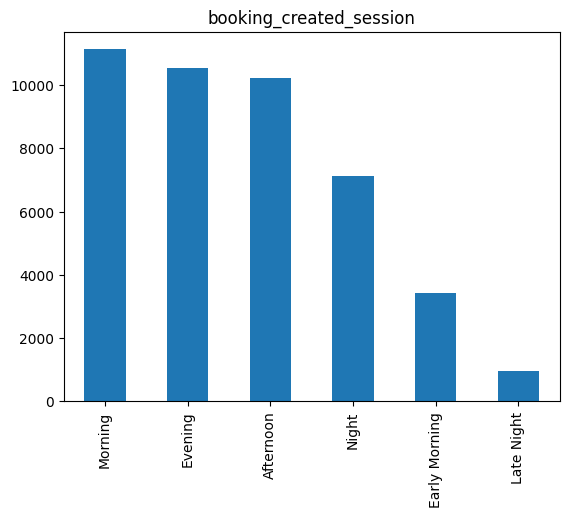

In [57]:
# visualisation about categorical data
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

## Dividing data into Numerical and Categorical dataframes

In [58]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [59]:
num.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff
0,0,0,1,0,3.980687,21.0
1,0,0,1,0,14.004432,395.0
2,0,0,1,0,12.648909,22.0
3,0,0,1,0,9.534596,66.0
4,0,0,1,0,14.655467,67.0


In [60]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


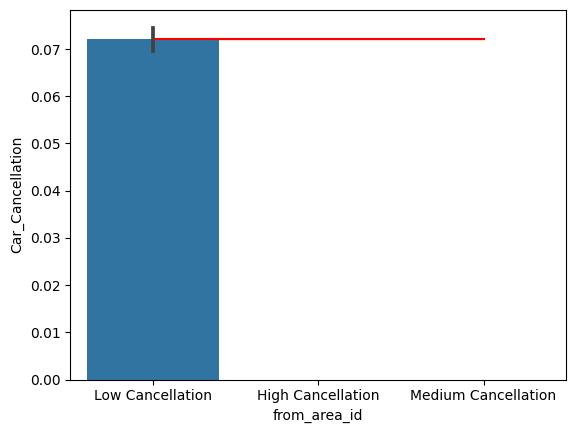

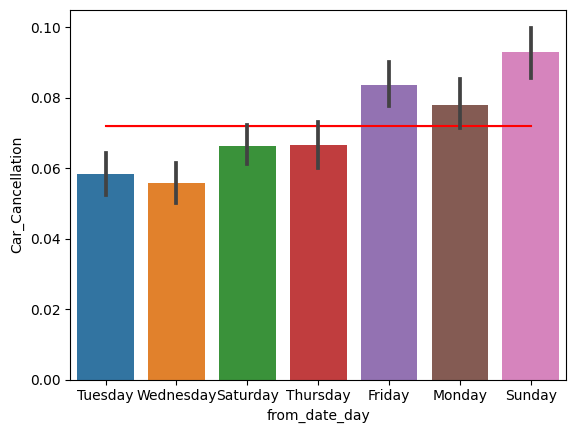

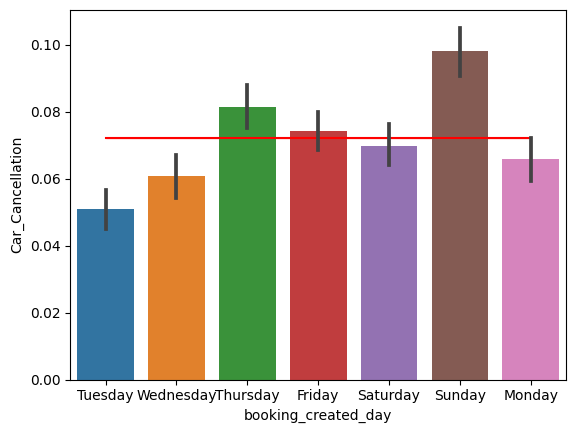

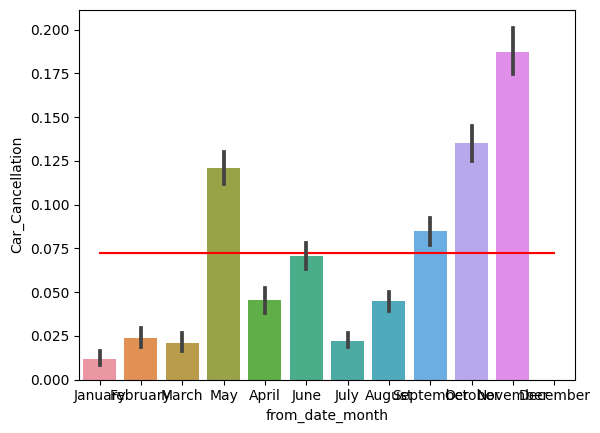

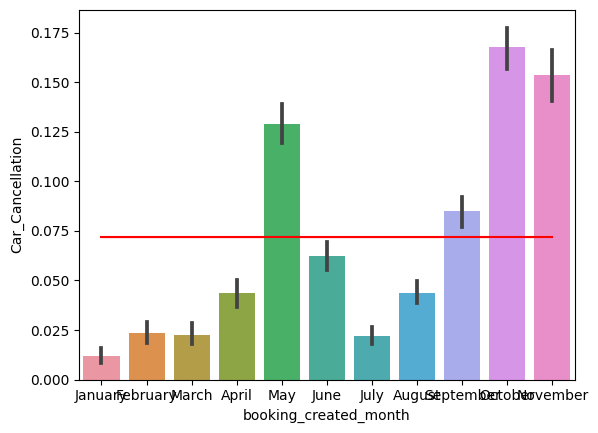

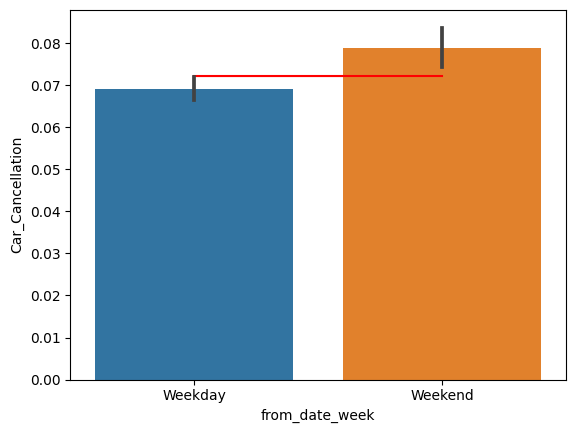

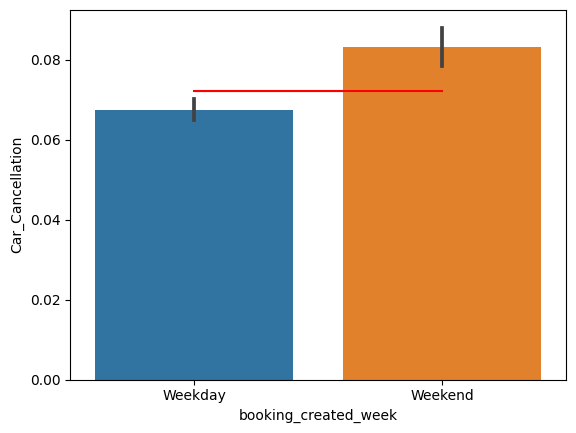

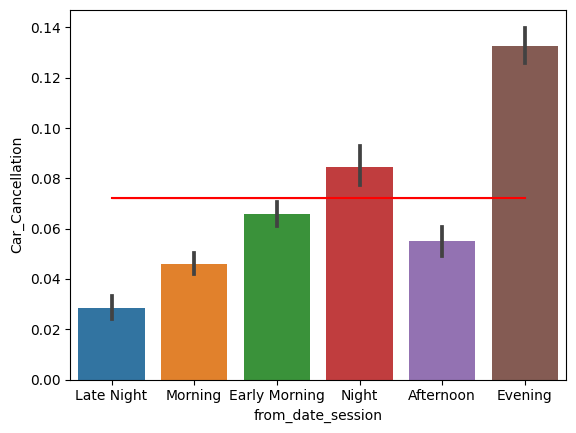

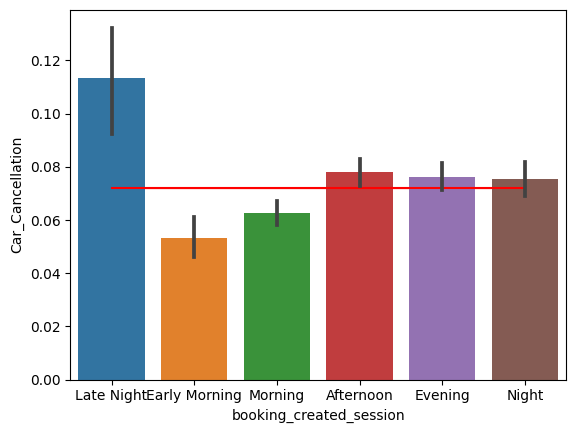

In [61]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

## Encoding Categorical variables

In [62]:
# encoding of Categorical variables
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(43431, 47)

In [63]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [64]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [65]:
data_all.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,1,0,3.980687,21.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,14.004432,395.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,12.648909,22.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,9.534596,66.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,14.655467,67.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [66]:
data_all.shape

(43431, 53)

## Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_all,target,test_size=0.2,random_state=0)

In [68]:
X_train.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
30976,1,0,1,0,10.362671,1199.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
40022,0,0,1,0,5.322934,36.0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
30078,0,0,0,1,3.564880,226.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
34586,1,0,1,0,14.511608,296.0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
21362,0,0,1,0,15.856414,3227.0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [69]:
X_test.head()

,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
3941,0,0,1,0,36.163930,151.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13692,0,1,1,0,5.679481,605.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
26458,1,0,0,1,28.576256,306.0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5488,1,0,1,0,23.668118,1490.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33341,0,0,1,0,21.212056,6108.0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [70]:
import warnings
warnings.filterwarnings('ignore')

## Model Building

**Logistic** **Regression**

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9285138713019454
Confusion Matrix : 
[[8036   36]
 [ 585   30]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8072
           1       0.45      0.05      0.09       615

    accuracy                           0.93      8687
   macro avg       0.69      0.52      0.53      8687
weighted avg       0.90      0.93      0.90      8687



In [74]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9245999769770922
Confusion Matrix : 
[[7987   85]
 [ 570   45]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8072
           1       0.35      0.07      0.12       615

    accuracy                           0.92      8687
   macro avg       0.64      0.53      0.54      8687
weighted avg       0.89      0.92      0.90      8687



In [75]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9023828709566019
Confusion Matrix : 
[[7620  452]
 [ 396  219]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8072
           1       0.33      0.36      0.34       615

    accuracy                           0.90      8687
   macro avg       0.64      0.65      0.64      8687
weighted avg       0.91      0.90      0.90      8687



In [76]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9353056291009555
Confusion Matrix : 
[[7969  103]
 [ 459  156]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8072
           1       0.60      0.25      0.36       615

    accuracy                           0.94      8687
   macro avg       0.77      0.62      0.66      8687
weighted avg       0.92      0.94      0.92      8687



In [77]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9036491308852308
Confusion Matrix : 
[[7635  437]
 [ 400  215]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8072
           1       0.33      0.35      0.34       615

    accuracy                           0.90      8687
   macro avg       0.64      0.65      0.64      8687
weighted avg       0.91      0.90      0.90      8687



In [78]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9354207436399217
Confusion Matrix : 
[[8011   61]
 [ 500  115]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8072
           1       0.65      0.19      0.29       615

    accuracy                           0.94      8687
   macro avg       0.80      0.59      0.63      8687
weighted avg       0.92      0.94      0.92      8687



In [79]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9361114308737194
Confusion Matrix : 
[[7984   88]
 [ 467  148]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8072
           1       0.63      0.24      0.35       615

    accuracy                           0.94      8687
   macro avg       0.79      0.61      0.66      8687
weighted avg       0.92      0.94      0.92      8687



In [80]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.387159
0:	learn: 0.3818641	total: 59.1ms	remaining: 5.85s
1:	learn: 0.2685095	total: 70.8ms	remaining: 3.47s
2:	learn: 0.2269190	total: 80.9ms	remaining: 2.62s
3:	learn: 0.2123730	total: 91.8ms	remaining: 2.2s
4:	learn: 0.2031907	total: 103ms	remaining: 1.95s
5:	learn: 0.1984652	total: 113ms	remaining: 1.77s
6:	learn: 0.1941608	total: 123ms	remaining: 1.64s
7:	learn: 0.1910081	total: 134ms	remaining: 1.54s
8:	learn: 0.1876635	total: 144ms	remaining: 1.46s
9:	learn: 0.1855118	total: 155ms	remaining: 1.39s
10:	learn: 0.1833021	total: 166ms	remaining: 1.34s
11:	learn: 0.1817082	total: 176ms	remaining: 1.29s
12:	learn: 0.1801978	total: 187ms	remaining: 1.25s
13:	learn: 0.1791720	total: 200ms	remaining: 1.23s
14:	learn: 0.1781694	total: 209ms	remaining: 1.19s
15:	learn: 0.1770796	total: 221ms	remaining: 1.16s
16:	learn: 0.1760193	total: 232ms	remaining: 1.13s
17:	learn: 0.1753699	total: 242ms	remaining: 1.1s
18:	learn: 0.1744919	total: 253ms	remaining: 1.08s
19:	learn

In [81]:
print(f"Accuracy Score of Ada Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9336940255554277
Confusion Matrix : 
[[7946  126]
 [ 450  165]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8072
           1       0.57      0.27      0.36       615

    accuracy                           0.93      8687
   macro avg       0.76      0.63      0.66      8687
weighted avg       0.92      0.93      0.92      8687



In [82]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9190744791067111
Confusion Matrix : 
[[7818  254]
 [ 449  166]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8072
           1       0.40      0.27      0.32       615

    accuracy                           0.92      8687
   macro avg       0.67      0.62      0.64      8687
weighted avg       0.91      0.92      0.91      8687



In [83]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9111315759180384
Confusion Matrix : 
[[7765  307]
 [ 465  150]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8072
           1       0.33      0.24      0.28       615

    accuracy                           0.91      8687
   macro avg       0.64      0.60      0.62      8687
weighted avg       0.90      0.91      0.91      8687



In [84]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat), ('XGboost', xgb),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

Learning rate set to 0.387159
0:	learn: 0.3818641	total: 10.7ms	remaining: 1.06s
1:	learn: 0.2685095	total: 22ms	remaining: 1.08s
2:	learn: 0.2269190	total: 32.1ms	remaining: 1.04s
3:	learn: 0.2123730	total: 43.1ms	remaining: 1.03s
4:	learn: 0.2031907	total: 53.8ms	remaining: 1.02s
5:	learn: 0.1984652	total: 64.4ms	remaining: 1.01s
6:	learn: 0.1941608	total: 74.8ms	remaining: 993ms
7:	learn: 0.1910081	total: 85.5ms	remaining: 983ms
8:	learn: 0.1876635	total: 96ms	remaining: 970ms
9:	learn: 0.1855118	total: 117ms	remaining: 1.05s
10:	learn: 0.1833021	total: 135ms	remaining: 1.09s
11:	learn: 0.1817082	total: 146ms	remaining: 1.07s
12:	learn: 0.1801978	total: 156ms	remaining: 1.04s
13:	learn: 0.1791720	total: 166ms	remaining: 1.02s
14:	learn: 0.1781694	total: 176ms	remaining: 997ms
15:	learn: 0.1770796	total: 186ms	remaining: 978ms
16:	learn: 0.1760193	total: 201ms	remaining: 983ms
17:	learn: 0.1753699	total: 212ms	remaining: 965ms
18:	learn: 0.1744919	total: 224ms	remaining: 956ms
19:	le

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7f83d62cf040>),
                             ('XGboost',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categor...
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Extra Tree', ExtraTreesClassifier()),
                             ('Light Gradient',
                              LGBMClassifier(learning_rate=1)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Ada Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('Logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier())])

In [85]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9354207436399217
Confusion Matrix : 
[[8019   53]
 [ 508  107]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      8072
           1       0.67      0.17      0.28       615

    accuracy                           0.94      8687
   macro avg       0.80      0.58      0.62      8687
weighted avg       0.92      0.94      0.92      8687



In [86]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               ],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_cat, acc_etc, acc_lgbm, acc_vtc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,XgBoost,0.936111
5,Gradient Boosting Classifier,0.935421
10,Voting Classifier,0.935421
3,Random Forest Classifier,0.935306
7,Cat Boost,0.933694
0,Logistic Regression,0.928514
1,KNN,0.924600
8,Extra Trees Classifier,0.919074
9,LGBM,0.911132
4,Ada Boost Classifier,0.903649


In [87]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')